# subplots - bar plots

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import seaborn as sns

In [3]:
mtcars = data('mtcars')
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


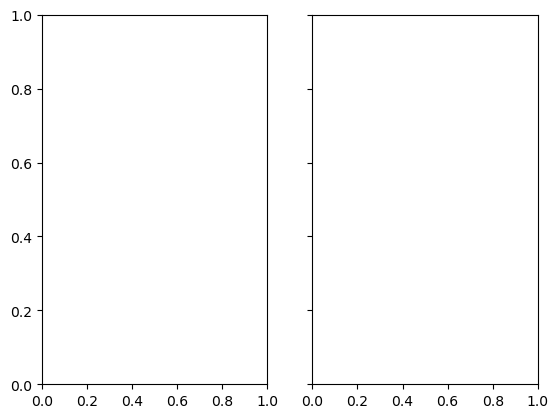

In [2]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True)

In [8]:
# prepare data summaries
#gear wise count
gearCount = mtcars.groupby('gear', as_index=False).agg(count = ('gear','count'))
cylCount = mtcars.groupby('cyl', as_index=False).agg(count = ('cyl','count'))
print(gearCount, cylCount)

   gear  count
0     3     15
1     4     12
2     5      5    cyl  count
0    4     11
1    6      7
2    8     14


In [55]:
for index, row in gearCount.iterrows():
    print(row['gear'], row['count'])

3 15
4 12
5 5


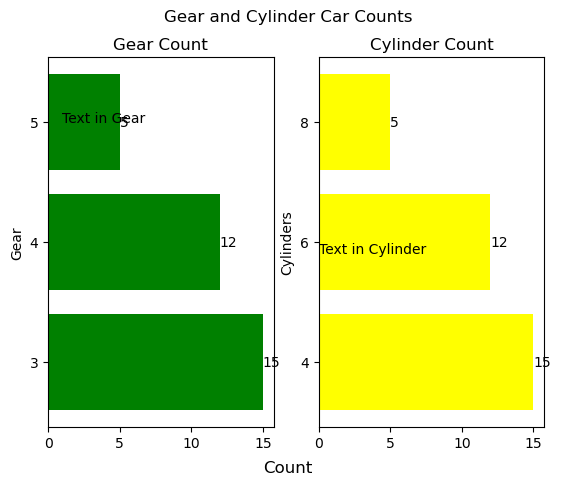

In [144]:
fig, axs = plt.subplots(nrows=1, ncols=2)
#plots
axs[0].barh(y=gearCount['gear'].astype('string'),  width = gearCount['count'], color='green')
axs[1].barh(y=cylCount['cyl'].astype('string'), width = gearCount['count'], color='yellow')
#label values
axs[0].bar_label(axs[0].containers[0], label_type='edge')
axs[1].bar_label(axs[1].containers[0], label_type='edge')
#xlables
axs[0].set_ylabel("Gear")
axs[1].set_ylabel('Cylinders')
#ylabels
fig.supxlabel('Count')
#titles
axs[0].set_title('Gear Count')
axs[1].set_title('Cylinder Count')
#text
axs[0].text(1,2, 'Text in Gear')
axs[1].text(0,1, 'Text in Cylinder', verticalalignment='top')

#figure title
fig.suptitle('Gear and Cylinder Car Counts')
plt.show();

In [94]:
#help(plt.barh)

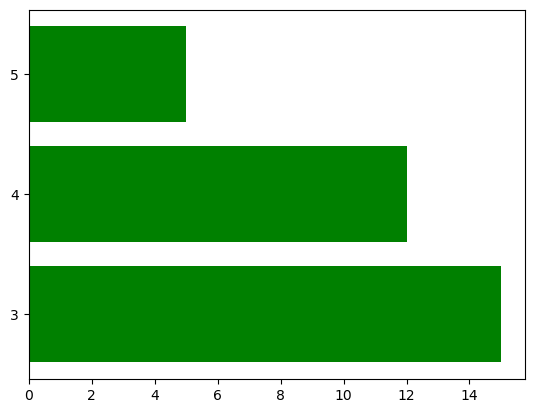

In [147]:
ax = plt.barh(y=gearCount['gear'].astype('string'),  width = gearCount['count'], color='green')
plt.show()

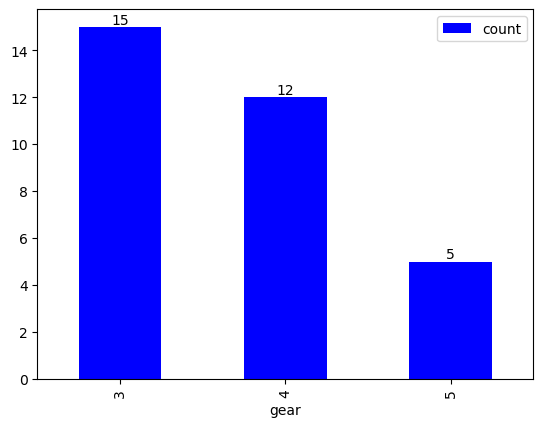

In [118]:
# pandas
gearCount2 = mtcars.groupby('gear').agg(count = ('gear','count'))
ax = gearCount2.plot(kind='bar', color=['blue'])
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

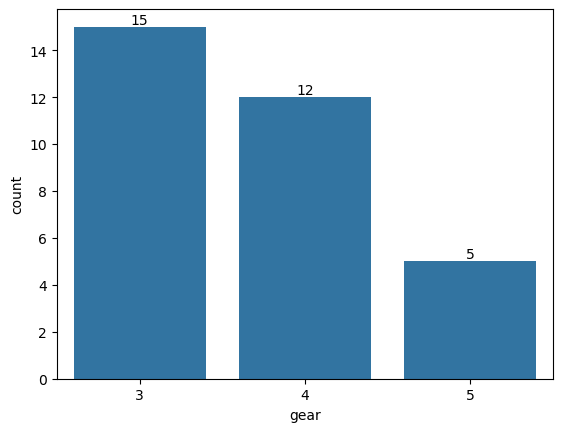

In [125]:
#seaborn
fig, ax = plt.subplots()
sns.barplot(data= gearCount,x='gear', y = 'count', ax=ax)
ax.bar_label(ax.containers[0])
plt.show()

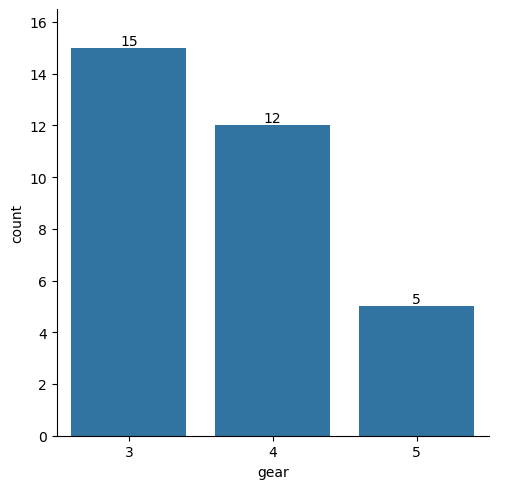

In [128]:
# sns cat plot
g = sns.catplot(kind='bar', data=gearCount, x='gear', y='count', height=5)
for ax in g.axes.flat:
    ax.bar_label(ax.containers[0], label_type='edge')
    ax.margins(y=0.1)

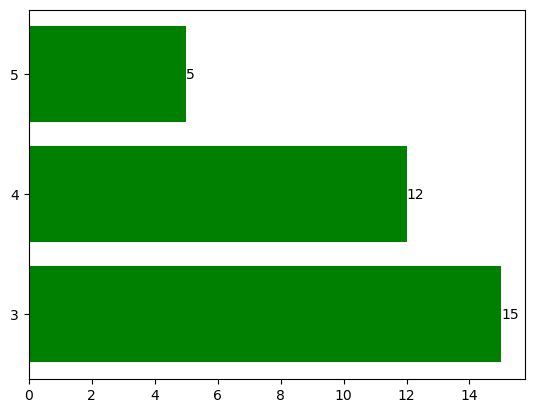

In [140]:
#mpl
fig, ax = plt.subplots()
ax.barh(y=gearCount['gear'].astype('string'),  width = gearCount['count'], color='green')
ax.set_yticks(gearCount['gear'].astype('string'))
ax.bar_label(ax.containers[0], label_type='edge')
plt.show();

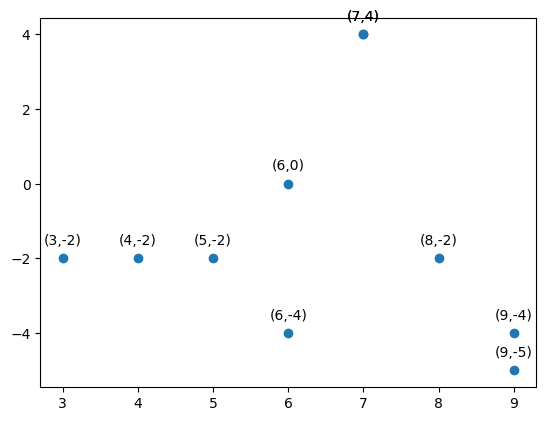

In [85]:
#using some dummy data for this example
xs = np.random.randint( 0, 10, size=10)
ys = np.random.randint(-5, 5,  size=10)

# plot the points
plt.scatter(xs,ys)

# zip joins x and y coordinates in pairs
for x,y in zip(xs,ys):

    label = f"({x},{y})"

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

# https://stackoverflow.com/questions/28931224/how-to-add-value-labels-on-a-bar-chart

In [155]:
# annotate grouped bar
gearMpgHP = mtcars.groupby(['gear']).agg(mpg = ('mpg','mean'), hp = ('hp','mean'))
gearMpgHP

,mpg,hp
gear,,
3,16.106667,176.133333
4,24.533333,89.500000
5,21.380000,195.600000


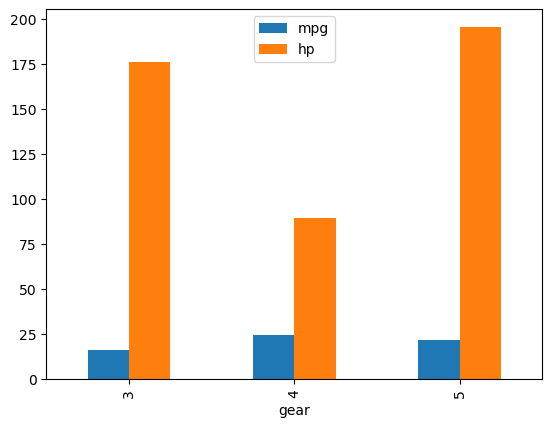

In [163]:
ax = gearMpgHP.plot(kind='bar')
plt.show()